In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Cargar el dataset
data = pd.read_csv('/content/Data/Dataset.csv')

# Eliminar la columna 'Descripción' ya que no es útil para la predicción
data = data.drop('Descripción', axis=1)

# Imprimir los primeros registros del dataframe
print("Primeros registros del dataframe:")
print(data.head())

# Separar las características (X) y la variable objetivo (y)
X = data.drop(['ID', 'Enfermedad', 'Clasificación'], axis=1)  # Características
y = data['Clasificación']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Primeros registros del dataframe:
   ID                         Enfermedad     Clasificación  dolor  tos  \
0   1              Hipertensión arterial  Cardiovasculares      0    0   
1   2  Insuficiencia cardíaca congestiva  Cardiovasculares      1    0   
2   3         Infarto agudo de miocardio  Cardiovasculares      1    0   
3   4              Fibrilación auricular  Cardiovasculares      0    0   
4   5              Cardiopatía isquémica  Cardiovasculares      1    0   

   fiebre  fatiga  dificultad para respirar  náuseas  vómitos  ...  palidez  \
0       0       1                         0        0        0  ...        0   
1       0       1                         1        1        0  ...        0   
2       0       1                         1        1        1  ...        0   
3       0       1                         0        0        0  ...        0   
4       0       1                         0        1        0  ...        0   

   dolor en las extremidades  dolor de gargant

In [ ]:
# Inicializar el modelo Gaussian Naive Bayes
model = GaussianNB()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.74
Informe de clasificación:
                    precision    recall  f1-score   support

  Cardiovasculares       0.53      0.38      0.44        21
Gastrointestinales       1.00      1.00      1.00        22
      Inmunológico       1.00      0.54      0.70        26
        Metabólico       0.56      0.83      0.67        18
      Neurológicas       0.73      0.90      0.81        21
   Osteomusculares       1.00      1.00      1.00        22
     Respiratorias       0.55      1.00      0.71        12
          Sentidos       0.97      0.64      0.77        45
     Tegumentarias       0.71      0.56      0.62        18
     Tegumentaries       0.00      0.00      0.00         0

          accuracy                           0.74       205
         macro avg       0.70      0.69      0.67       205
      weighted avg       0.83      0.74      0.76       205



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Regresión Logística
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
print("Regresión Logística - Precisión:", accuracy_score(y_test, logistic_predictions))
print("Informe de clasificación:\n", classification_report(y_test, logistic_predictions))

# Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
print("Árbol de Decisión - Precisión:", accuracy_score(y_test, tree_predictions))
print("Informe de clasificación:\n", classification_report(y_test, tree_predictions))

  # Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
print("Random Forest - Precisión:", accuracy_score(y_test, forest_predictions))
print("Informe de clasificación:\n", classification_report(y_test, forest_predictions))

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM - Precisión:", accuracy_score(y_test, svm_predictions))
print("Informe de clasificación:\n", classification_report(y_test, svm_predictions))

Regresión Logística - Precisión: 0.9121951219512195
Informe de clasificación:
                     precision    recall  f1-score   support

  Cardiovasculares       0.95      0.86      0.90        21
Gastrointestinales       1.00      1.00      1.00        22
      Inmunológico       0.92      0.92      0.92        26
        Metabólico       0.89      0.89      0.89        18
      Neurológicas       1.00      0.95      0.98        21
   Osteomusculares       1.00      1.00      1.00        22
     Respiratorias       1.00      1.00      1.00        12
          Sentidos       0.77      0.98      0.86        45
     Tegumentarias       1.00      0.50      0.67        18

          accuracy                           0.91       205
         macro avg       0.95      0.90      0.91       205
      weighted avg       0.93      0.91      0.91       205

Árbol de Decisión - Precisión: 0.9121951219512195
Informe de clasificación:
                     precision    recall  f1-score   support



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE


Información sobre la clase 'Tegumentarias':
               ID      dolor   tos     fiebre     fatiga  \
count   95.000000  95.000000  95.0  95.000000  95.000000   
mean   437.157895   0.547368   0.0   0.178947   0.115789   
std     27.801085   0.500392   0.0   0.385342   0.321670   
min    390.000000   0.000000   0.0   0.000000   0.000000   
25%    413.500000   0.000000   0.0   0.000000   0.000000   
50%    437.000000   1.000000   0.0   0.000000   0.000000   
75%    460.500000   1.000000   0.0   0.000000   0.000000   
max    485.000000   1.000000   0.0   1.000000   1.000000   

       dificultad para respirar  náuseas  vómitos  diarrea  estreñimiento  \
count                      95.0     95.0     95.0     95.0           95.0   
mean                        0.0      0.0      0.0      0.0            0.0   
std                         0.0      0.0      0.0      0.0            0.0   
min                         0.0      0.0      0.0      0.0            0.0   
25%                         0

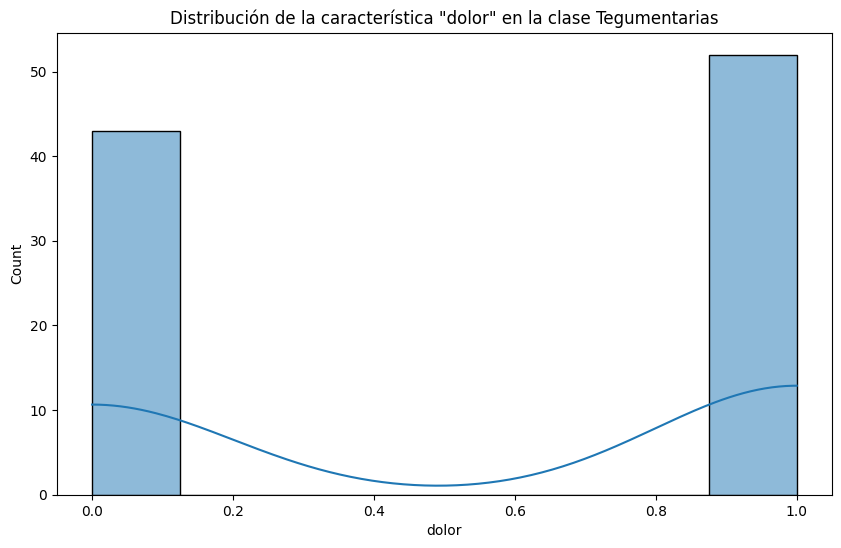


Registros Tegumentaries en test:
 Empty DataFrame
Columns: [ID, Enfermedad, Clasificación, dolor, tos, fiebre, fatiga, dificultad para respirar, náuseas, vómitos, diarrea, estreñimiento, trastornos del sueño, ansiedad, mareos, dolor de cabeza, dolor abdominal, dolor de espalda, dolor torácico, palpitaciones, sudoración excesiva, escalofríos, rigidez muscular, dolor en las articulaciones, confusión, pérdida de apetito, pérdida de peso, depresión, irritabilidad, somnolencia, acidez, erupciones cutáneas, dolor en el cuello, congestión nasal, secreción nasal, dificultad para tragar, zumbido en los oídos, visión borrosa, fotofobia, dolor en el hombro, dolor lumbar, calambres, hinchazón, palidez, dolor en las extremidades, dolor de garganta, irritación en la garganta, dificultad para concentrarse, inquietud, temblores, desmayo, sensación de opresión en el pecho, picazón]
Index: []

[0 rows x 53 columns]


In [ ]:
# Análisis de la clase 'Tegumentarias'
tegumentarias_data = data[data['Clasificación'] == 'Tegumentarias']

# Imprimir información sobre la clase
print("\nInformación sobre la clase 'Tegumentarias':")
print(tegumentarias_data.describe())

# Contar el número de muestras en la clase
print("\nNúmero de muestras en la clase 'Tegumentarias':", len(tegumentarias_data))

# Visualizar la distribución de algunas características clave
plt.figure(figsize=(10, 6))
sns.histplot(data=tegumentarias_data, x='dolor', kde=True)
plt.title('Distribución de la característica "dolor" en la clase Tegumentarias')
plt.show()

# Identificar qué registros fueron asignados como "Tegumentaries"
tegumentaries_data_test = data.iloc[y_test.index][y_test == 'Tegumentaries']

print("\nRegistros Tegumentaries en test:\n", tegumentaries_data_test)

In [ ]:
# Contar el número de muestras por clase
class_counts = data['Clasificación'].value_counts()

# Identificar las clases con menos de 2 muestras
rare_classes = class_counts[class_counts < 2].index

# Duplicar las muestras de las clases raras
for rare_class in rare_classes:
    rare_data = data[data['Clasificación'] == rare_class]
    if not rare_data.empty: #Aseguramos que sea no vacía
        data = pd.concat([data, rare_data], ignore_index=True)

# Separar las características (X) y la variable objetivo (y)
X = data.drop(['ID', 'Enfermedad', 'Clasificación'], axis=1)  # Características
y = data['Clasificación']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar que la clase 'Tegumentarias' esté presente en ambos conjuntos
print("\nNúmero de muestras en 'Tegumentarias' en el conjunto de entrenamiento:", sum(y_train == 'Tegumentarias'))
print("Número de muestras en 'Tegumentarias' en el conjunto de prueba:", sum(y_test == 'Tegumentarias'))


Número de muestras en 'Tegumentarias' en el conjunto de entrenamiento: 76
Número de muestras en 'Tegumentarias' en el conjunto de prueba: 19


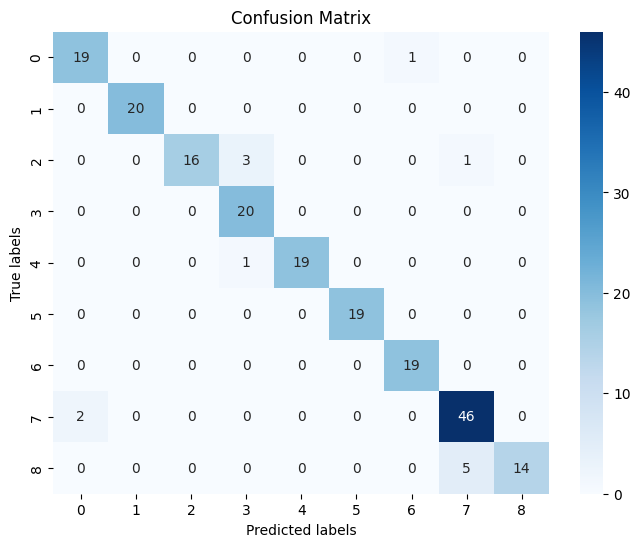

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir y entrenar el modelo Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Predecir con el modelo en el conjunto de prueba
y_pred = forest_model.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import random

# Funciones para agregar aleatoriedad
def agregar_caracteristica_aleatoria(df, nombre_caracteristica):
    df[nombre_caracteristica] = df['Clasificación'].apply(lambda x: random.randint(0, 1) if x == 'Tegumentarias' else 0)
    return df

# Agregar características específicas de enfermedades tegumentarias
data = agregar_caracteristica_aleatoria(data, 'enrojecimiento')
data = agregar_caracteristica_aleatoria(data, 'descamación')
data = agregar_caracteristica_aleatoria(data, 'ronchas')

# Verificar las nuevas características
print("\nPrimeros registros del dataframe con nuevas características:")
print(data.head())

# Separar las características (X) y la variable objetivo (y)
X = data.drop(['ID', 'Enfermedad', 'Clasificación'], axis=1)  # Características
y = data['Clasificación']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Primeros registros del dataframe con nuevas características:
   ID                         Enfermedad     Clasificación  dolor  tos  \
0   1              Hipertensión arterial  Cardiovasculares      0    0   
1   2  Insuficiencia cardíaca congestiva  Cardiovasculares      1    0   
2   3         Infarto agudo de miocardio  Cardiovasculares      1    0   
3   4              Fibrilación auricular  Cardiovasculares      0    0   
4   5              Cardiopatía isquémica  Cardiovasculares      1    0   

   fiebre  fatiga  dificultad para respirar  náuseas  vómitos  ...  \
0       0       1                         0        0        0  ...   
1       0       1                         1        1        0  ...   
2       0       1                         1        1        1  ...   
3       0       1                         0        0        0  ...   
4       0       1                         0        1        0  ...   

   dificultad para concentrarse  inquietud  temblores  desmayo  \
0     

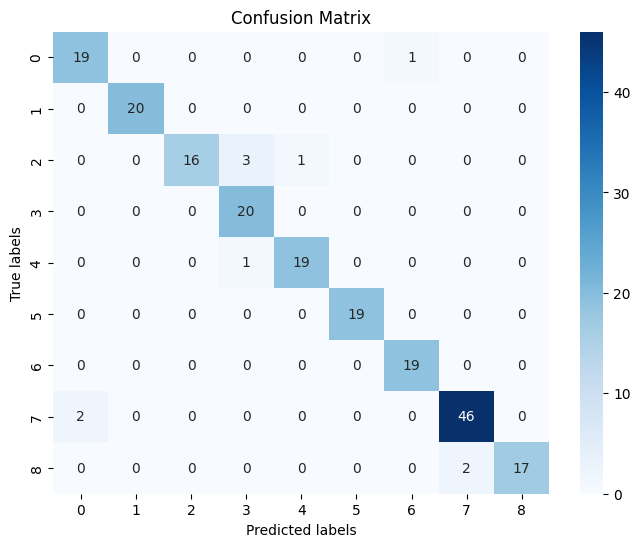

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Ajustar y entrenar el modelo Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Predecir con el modelo en el conjunto de prueba
y_pred = forest_model.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Eliminar la clase "Tegumentarias" del dataset
data = data[data['Clasificación'] != 'Tegumentarias']

# Separar las características (X) y la variable objetivo (y)
X = data.drop(['ID', 'Enfermedad', 'Clasificación'], axis=1)  # Características
y = data['Clasificación']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reentrenar el modelo con los datos preprocesados
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Predecir con el modelo en el conjunto de prueba
y_pred = forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print(f"\nPrecisión del modelo: {accuracy:.2f}")

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.96
Informe de clasificación:
                    precision    recall  f1-score   support

  Cardiovasculares       0.90      0.95      0.93        20
Gastrointestinales       1.00      1.00      1.00        20
      Inmunológico       1.00      0.80      0.89        20
        Metabólico       0.83      1.00      0.91        20
      Neurológicas       1.00      0.95      0.97        20
   Osteomusculares       1.00      1.00      1.00        19
     Respiratorias       0.95      1.00      0.97        19
          Sentidos       0.98      0.96      0.97        48

          accuracy                           0.96       186
         macro avg       0.96      0.96      0.96       186
      weighted avg       0.96      0.96      0.96       186



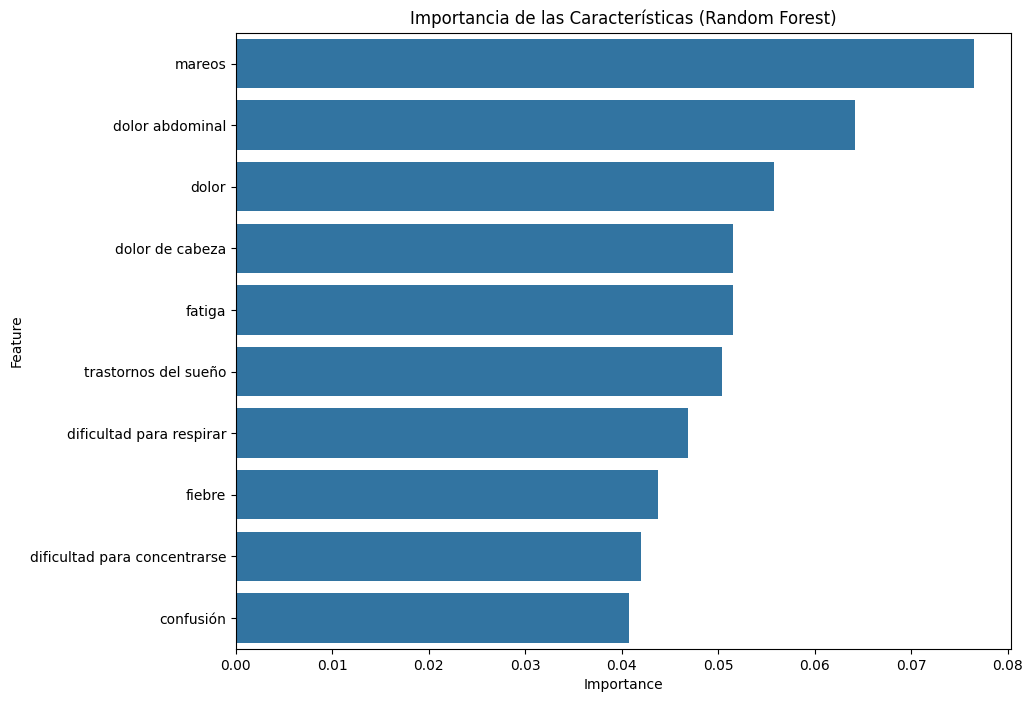

In [ ]:
feature_importances = forest_model.feature_importances_
feature_names = X.columns  # Nombre de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df[:10])  # Mostrar las 10 más importantes
plt.title('Importancia de las Características (Random Forest)')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir la grilla de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [5, 10, 15],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 4, 6],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 3]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Inicializar el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Mejores hiperparámetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predecir con el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo ajustado: {accuracy:.2f}")

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo ajustado: 0.95
Informe de clasificación:
                    precision    recall  f1-score   support

  Cardiovasculares       0.90      0.95      0.93        20
Gastrointestinales       1.00      1.00      1.00        20
      Inmunológico       1.00      0.80      0.89        20
        Metabólico       0.83      0.95      0.88        20
      Neurológicas       1.00      0.95      0.97        20
   Osteomusculares       0.95      1.00      0.97        19
     Respiratorias       0.95      1.00      0.97        19
          Sentidos       0.98      0.96      0.97        48

          accuracy                           0.95       186
         macro avg       0.95      0.95      0.95       186
      weighted avg       0.96      0.95      0.95       186

